In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Carregar os dados
df = pd.read_csv('Population1.csv')

In [17]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


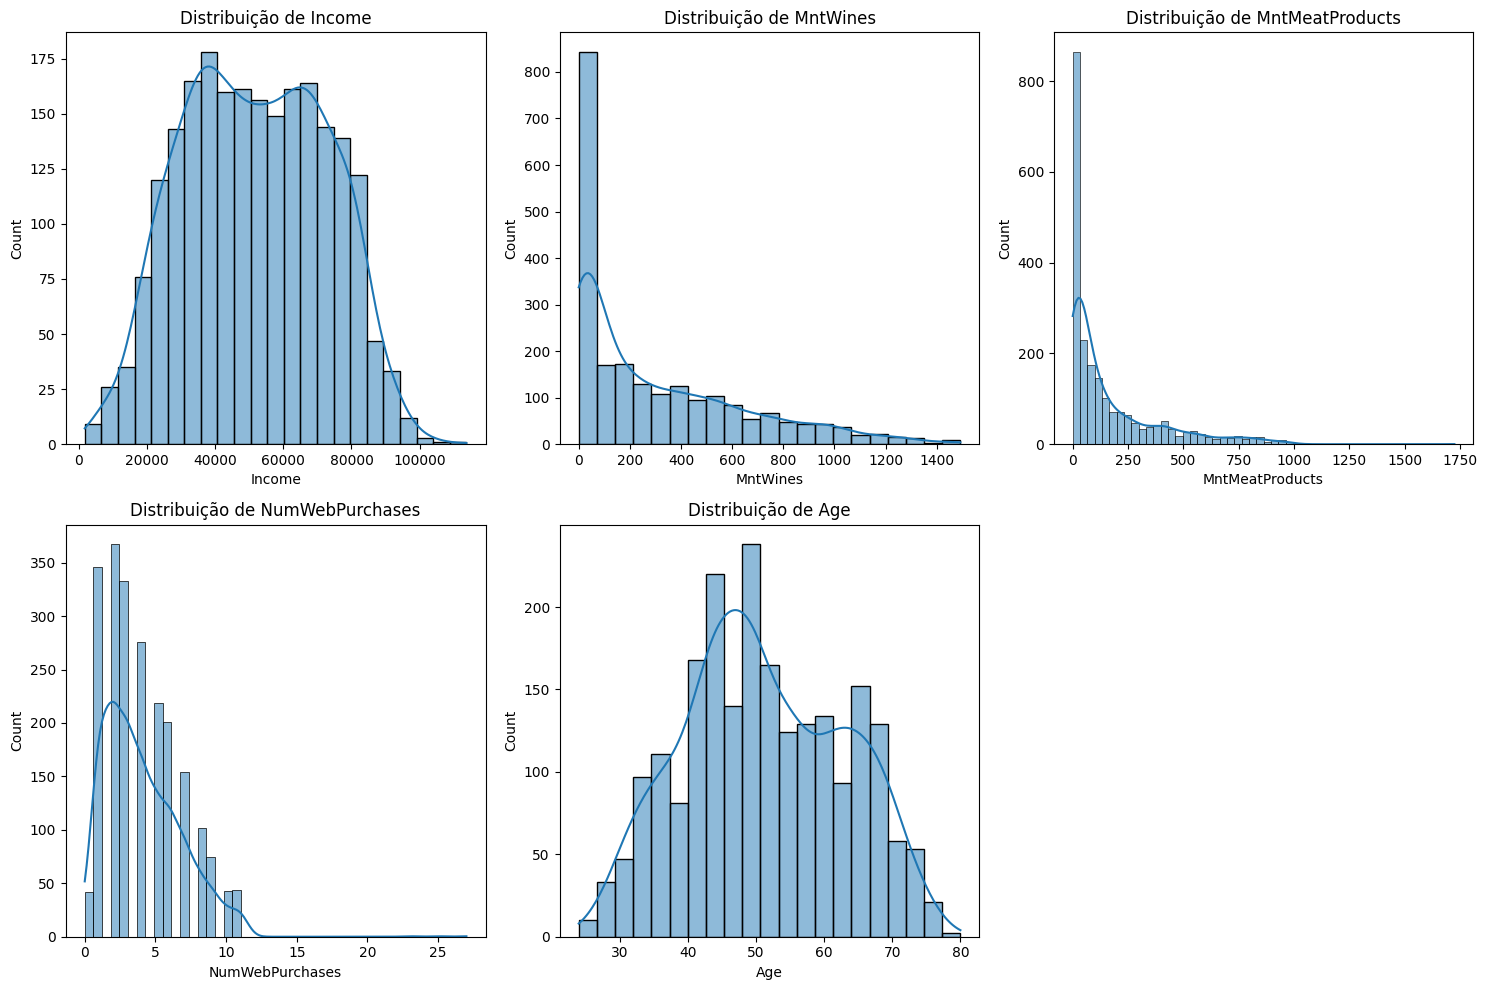

In [18]:
# Histogramas para visualizar as distribuições
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Income', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'Age'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

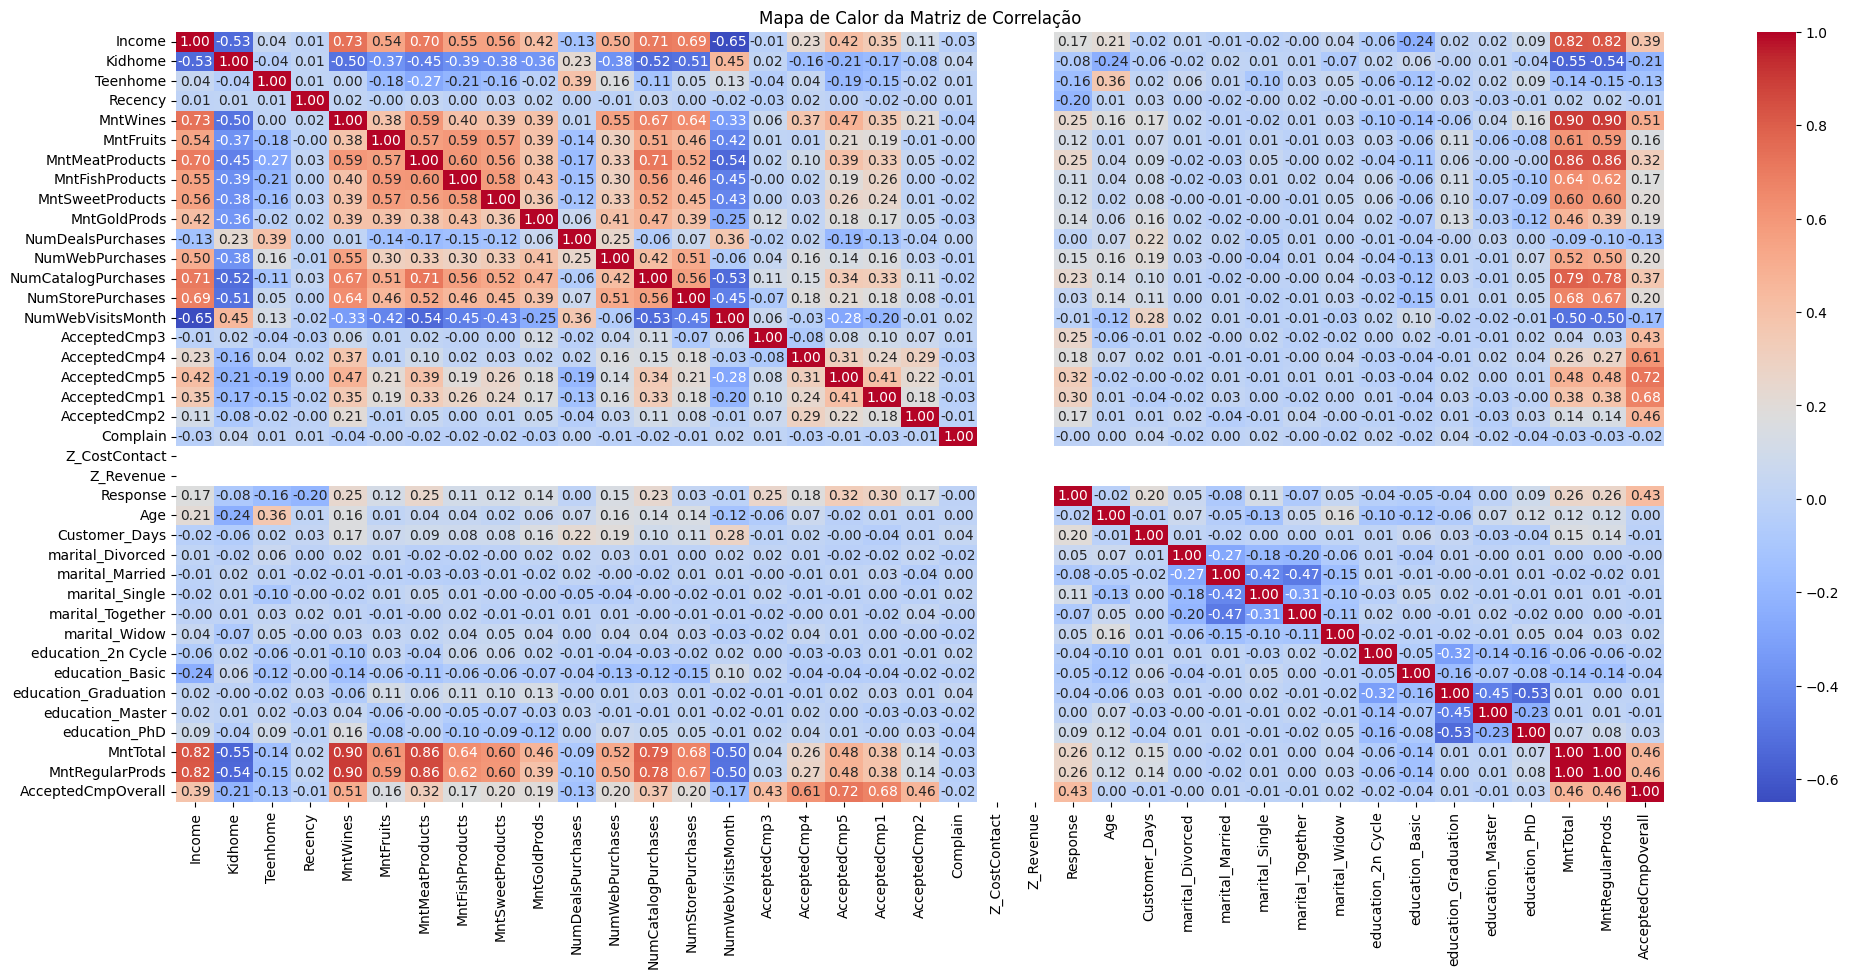

In [19]:
# Mapa de calor das correlações
plt.figure(figsize=(24, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

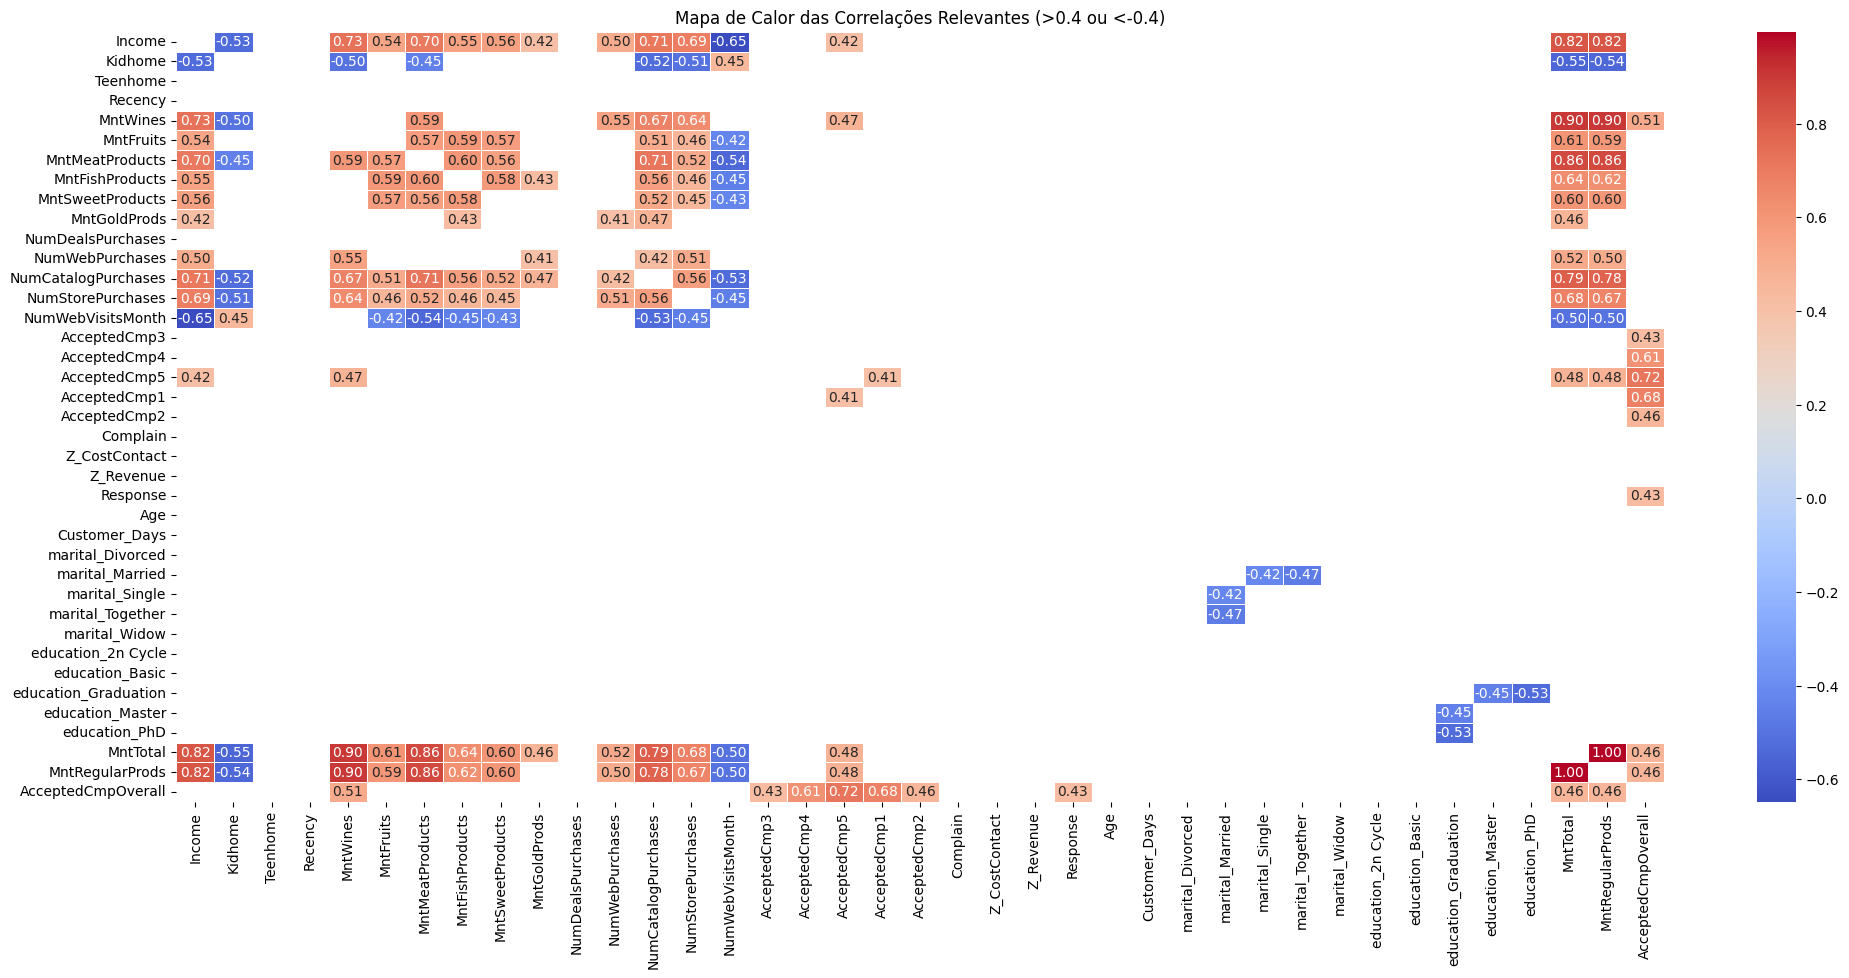

In [26]:
correlation_matrix = df.corr()

# Filtrar a matriz para manter apenas valores onde o módulo da correlação é maior que 0.4, exceto a diagonal principal
filtered_corr = correlation_matrix[correlation_matrix.abs() > 0.4]
np.fill_diagonal(filtered_corr.values, None)

# Criando o mapa de calor com as correlações filtradas
plt.figure(figsize=(24, 10))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Mapa de Calor das Correlações Relevantes (>0.4 ou <-0.4)')
plt.show()

In [20]:
# Gráfico de barras para comparação de categorias
plt.figure(figsize=(10, 6))
sns.barplot(x='marital_Status', y='MntTotal', data=df)
plt.title('Consumo Total Médio por Estado Civil')
plt.ylabel('Consumo Total Médio')
plt.xlabel('Estado Civil')
plt.show()

ValueError: Could not interpret value `marital_Status` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [21]:
# Análise descritiva básica
print("Descrição Estatística do Dataset:")
print(df.describe())

# Verificar a existência de valores nulos
print("\nVerificação de Valores Nulos:")
print(df.isnull().sum())

# Análise de correlação
print("\nMatriz de Correlação:")
correlation_matrix = df.corr()
print(correlation_matrix)

# (Opcional) Salvar a matriz de correlação em um arquivo CSV
correlation_matrix.to_csv('matriz_de_correlacao.csv')

# Explorar mais algumas estatísticas para insights específicos
# Por exemplo, médias de consumo por estado civil
print("\nMédia de Consumo por Estado Civil:")
print(df.groupby('marital_Status')['MntTotal'].mean())


Descrição Estatística do Dataset:
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635       

KeyError: 'marital_Status'